import the libraries


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1


### Starting off with creating the `overweight` column


#### Calculate the BMI


loading the data


In [17]:
medical_records = pd.read_csv('./medical_examination.csv') 

In [18]:
medical_records.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Divide their weight in **kilograms** by the `square` of their height in **meters**. If that value is > 25 then the person is overweight. Use the value `0` for NOT overweight and the value `1` for overweight


In [19]:
# making a new column that contains height converted in meters and squared 
medical_records['height_meters_squared'] = medical_records['height'].apply(lambda x : (x * 0.01)**2)
medical_records['height_meters_squared']

0        2.8224
1        2.4336
2        2.7225
3        2.8561
4        2.4336
          ...  
69995    2.8224
69996    2.4964
69997    3.3489
69998    2.6569
69999    2.8900
Name: height_meters_squared, Length: 70000, dtype: float64

In [20]:
# once we've prepped the height criteria we can now divide weight with it 
medical_records['BMI'] = medical_records['weight'] / medical_records['height_meters_squared']
medical_records['overweight'] = medical_records['BMI'].apply(lambda x : 1 if x > 25 else 0)
medical_records['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

In [21]:
medical_records.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_meters_squared,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,2.8224,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,2.4336,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,2.7225,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,2.8561,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,2.4336,23.011177,0


# Task 2


Normalizing `gluc` and `cholestrol`


In [22]:
medical_records['cholesterol'] = medical_records['cholesterol'].apply(lambda x : 0 if x == 1 else 1)
medical_records['gluc'] = medical_records['gluc'].apply(lambda x : 0 if x == 1 else 1)
medical_records

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_meters_squared,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,2.8224,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,2.4336,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,2.7225,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,2.8561,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,2.4336,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,2.8224,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,2.4964,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,3.3489,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,2.6569,27.099251,1


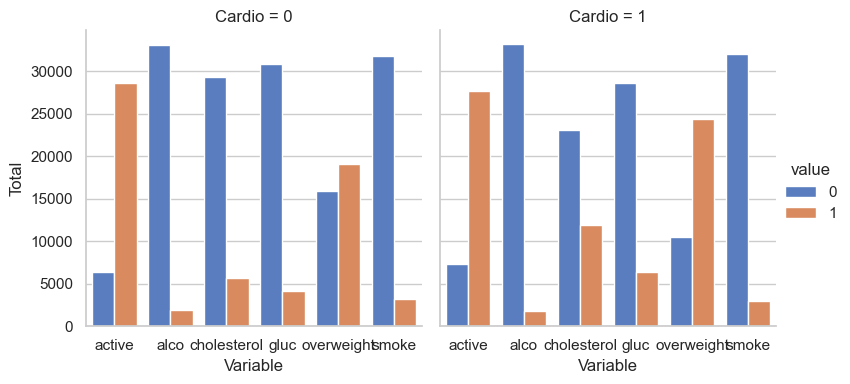

In [23]:
categorical_features = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']

long_format = pd.melt(medical_records, id_vars=['id', 'cardio'], value_vars=categorical_features, var_name='variable', value_name='value')

sns.set_theme(style="whitegrid")

g = sns.catplot(data=long_format, x='variable', col='cardio', hue='value', kind='count', col_wrap=2, height=4, aspect=1, palette='muted')

g.set_axis_labels("Variable", "Total")
g.set_titles("Cardio = {col_name}")

# Show the plot
plt.show()

In [26]:
df = medical_records.copy()

In [27]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_meters_squared,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,2.8224,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,2.4336,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,2.7225,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,2.8561,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,2.4336,23.011177,0


In [32]:
df = df[(df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))]

In [34]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_meters_squared,BMI,overweight
62,81,20330,2,187,115.0,130,90,0,0,0,1,1,0,3.4969,32.886271,1
76,105,20397,2,188,105.0,120,80,0,0,0,0,1,1,3.5344,29.708013,1
94,127,15946,2,185,88.0,133,89,1,1,0,0,1,0,3.4225,25.712199,1
137,184,22536,2,184,82.0,130,80,0,0,0,0,1,0,3.3856,24.220227,0
193,261,14638,2,185,94.0,120,80,0,0,0,0,1,0,3.4225,27.465303,1


In [51]:
df = df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
df = df.drop(columns=['BMI', 'height_meters_squared'], errors='ignore')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
62,81,20330,2,187,115.0,130,90,0,0,0,1,1,0,1
76,105,20397,2,188,105.0,120,80,0,0,0,0,1,1,1
94,127,15946,2,185,88.0,133,89,1,1,0,0,1,0,1
137,184,22536,2,184,82.0,130,80,0,0,0,0,1,0,0
193,261,14638,2,185,94.0,120,80,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69756,99636,18196,1,184,81.0,120,80,0,0,0,0,1,0,0
69772,99660,21740,2,184,74.0,120,80,0,0,0,0,1,0,0
69781,99670,21213,2,184,73.0,120,80,0,0,0,0,1,1,0
69873,99799,19736,2,188,108.0,130,80,1,1,0,1,0,1,1


In [52]:
corr = df.corr()

In [53]:
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.026869,-0.000034,-0.029441,0.032478,-0.019717,-0.061423,0.065352,0.024188,0.029341,-0.021017,-0.029281,0.023504,0.052831
age,0.026869,1.000000,-0.011831,-0.009337,0.010772,0.043310,0.037947,0.051126,0.069385,-0.065626,-0.048236,0.009621,0.138375,0.005094
sex,-0.000034,-0.011831,1.000000,-0.034383,0.174530,0.049052,0.028012,0.087138,0.025857,0.164903,0.086678,0.039042,0.068939,0.188634
height,-0.029441,-0.009337,-0.034383,1.000000,0.026774,0.012418,-0.014292,-0.054185,-0.056589,-0.000725,0.025119,-0.054750,0.008959,-0.154562
weight,0.032478,0.010772,0.174530,0.026774,1.000000,0.234984,0.055351,0.202556,0.154029,-0.025825,0.065228,0.060331,0.181644,0.776401
ap_hi,-0.019717,0.043310,0.049052,0.012418,0.234984,1.000000,0.072794,0.220017,0.197068,0.050342,0.065784,-0.044994,0.343530,0.227175
ap_lo,-0.061423,0.037947,0.028012,-0.014292,0.055351,0.072794,1.000000,0.001758,0.003223,-0.020279,0.009688,0.039600,0.069243,0.038926
cholesterol,0.065352,0.051126,0.087138,-0.054185,0.202556,0.220017,0.001758,1.000000,0.365839,0.157483,0.071357,0.027176,0.216767,0.178227
gluc,0.024188,0.069385,0.025857,-0.056589,0.154029,0.197068,0.003223,0.365839,1.000000,0.025521,0.072254,-0.005272,0.023960,0.143496
smoke,0.029341,-0.065626,0.164903,-0.000725,-0.025825,0.050342,-0.020279,0.157483,0.025521,1.000000,0.356294,0.113430,0.043637,0.013250


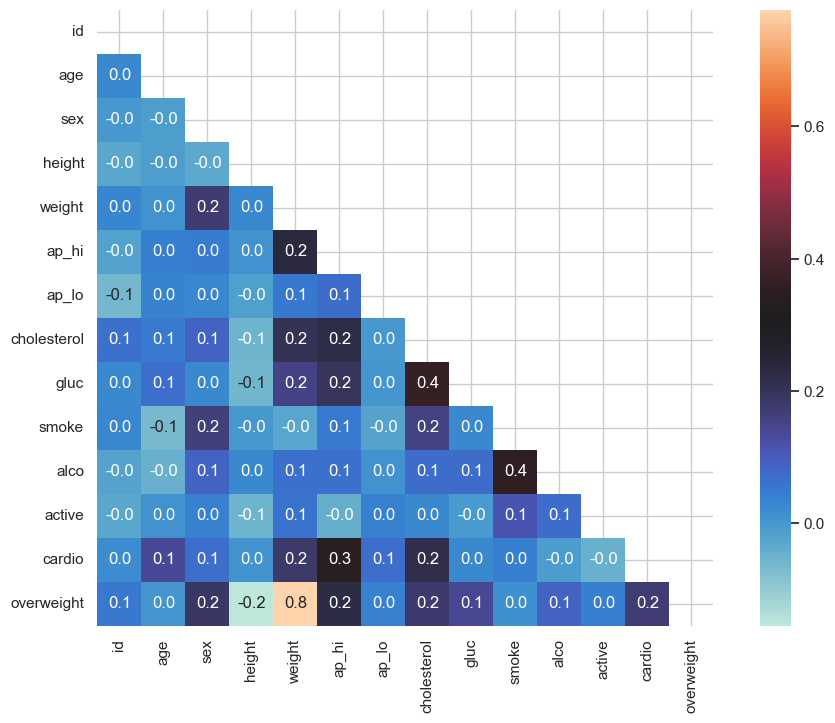

In [56]:
import numpy as np

mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(12, 8)) 
sns.heatmap(
        corr,
        mask=mask, 
        cmap='icefire',  
        square=True, 
        annot=True,
        fmt='.1f' 
)
plt.show()